In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('data/webmd.csv')

In [3]:
df = df.loc[df['Condition'].str.contains("Osteoporosis", case=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 4147 to 361296
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2278 non-null   object
 1   Condition      2278 non-null   object
 2   Date           2278 non-null   object
 3   Drug           2278 non-null   object
 4   DrugId         2278 non-null   int64 
 5   EaseofUse      2278 non-null   int64 
 6   Effectiveness  2278 non-null   int64 
 7   Reviews        2278 non-null   object
 8   Satisfaction   2278 non-null   int64 
 9   Sex            2278 non-null   object
 10  Sides          2278 non-null   object
 11  UsefulCount    2278 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 231.4+ KB


In [4]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [5]:
df = df.drop_duplicates('Reviews')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 4147 to 360371
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1363 non-null   object        
 1   Condition      1363 non-null   object        
 2   Date           1363 non-null   datetime64[ns]
 3   Drug           1363 non-null   object        
 4   DrugId         1363 non-null   int64         
 5   EaseofUse      1363 non-null   int64         
 6   Effectiveness  1363 non-null   int64         
 7   Reviews        1363 non-null   object        
 8   Satisfaction   1363 non-null   int64         
 9   Sex            1363 non-null   object        
 10  Sides          1363 non-null   object        
 11  UsefulCount    1363 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 138.4+ KB


In [6]:
#Only Drugs with more than 10 reviews
"""
Drug = []
for i in df['Drug'].unique():
    if np.sum(df.Drug == i) >= 10:
        Drug.append(i)

tmp = []

for drugs in df['Drug']:
    if drugs in Drug:
        tmp.append(1)
    else:
        tmp.append(0)

df['temp'] = tmp
df = df[df['temp'] == 1]
"""

"\nDrug = []\nfor i in df['Drug'].unique():\n    if np.sum(df.Drug == i) >= 10:\n        Drug.append(i)\n\ntmp = []\n\nfor drugs in df['Drug']:\n    if drugs in Drug:\n        tmp.append(1)\n    else:\n        tmp.append(0)\n\ndf['temp'] = tmp\ndf = df[df['temp'] == 1]\n"

# All Osteoporosis Related Illnesses

In [7]:
print('number of reviews: ', df.shape)
print("number of males: ", sum(df['Sex'] == 'Male'))
print("number of females: ", sum(df['Sex'] == 'Female'))
print('list of conditions: \n', df['Condition'].unique())
print('number of conditions: ', df['Condition'].unique().shape)
print('number of drugs: ', df['Drug'].unique().shape)
print(min(df['Date']))
print(max(df['Date']))

number of reviews:  (1363, 12)
number of males:  71
number of females:  1116
list of conditions: 
 ['Osteoporosis' 'Post-Menopausal Osteoporosis Prevention'
 'Osteoporosis in Male Patient'
 'Aromatase Inhibitor Drug-Induced Osteoporosis'
 'Osteoporosis in Men due to Deficient Function of Testis'
 'Glucocorticoid-Induced Osteoporosis Prevention'
 'Osteoporosis caused by Glucocorticoid Drugs'
 'osteoporosis in postmenopausal woman at high risk for fracture'
 'Osteoporosis caused by Anti-Androgen Drugs']
number of conditions:  (9,)
number of drugs:  (71,)
2007-09-18 00:00:00
2020-02-27 00:00:00


# ONLY Osteoporosis and TYMLOS related condition

In [8]:
df_ost = df[df['Condition'] == "Osteoporosis"]
df_ost2 = df.loc[df['Drug'].str.contains("tymlos", case=False)]
df_ost = pd.concat([df_ost,df_ost2])
df_ost['Year'] = df_ost['Date'].dt.year

In [9]:
print('number of reviews: ', df_ost.shape)
print("number of males: ", sum(df_ost['Sex'] == 'Male'))
print("number of females: ", sum(df_ost['Sex'] == 'Female'))
print('list of conditions: \n', df_ost['Condition'].unique())
print('number of conditions: ', df_ost['Condition'].unique().shape)
print('number of drugs: ', df_ost['Drug'].unique().shape)
print(min(df_ost['Date']))
print(max(df_ost['Date']))

number of reviews:  (886, 13)
number of males:  38
number of females:  710
list of conditions: 
 ['Osteoporosis'
 'osteoporosis in postmenopausal woman at high risk for fracture']
number of conditions:  (2,)
number of drugs:  (37,)
2007-09-18 00:00:00
2020-02-27 00:00:00


# Repeat Rows as many times as usefulcount

In [10]:
df_ost.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
4147,25-34,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0,2010
18993,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,2010
61145,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,2012
72313,75 or over,Osteoporosis,2015-02-23,os-cal 500-vit d3,16527,1,3,Food dyes and talc...large pill for a newly re...,1,Female,Constipation or stomach upset may occur.,1,2015
72315,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,2012


In [11]:
print('Reviews with useful count = 0: ', np.sum(df_ost['UsefulCount'] == 0))

Reviews with useful count = 0:  16


In [12]:
df_ost = df_ost.loc[df_ost.index.repeat(df_ost.UsefulCount)]
df_ost = pd.concat([df_ost,df_ost2])
df_ost

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year
18993,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1,2010.0
61145,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,2012.0
61145,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2,2012.0
72313,75 or over,Osteoporosis,2015-02-23,os-cal 500-vit d3,16527,1,3,Food dyes and talc...large pill for a newly re...,1,Female,Constipation or stomach upset may occur.,1,2015.0
72315,45-54,Osteoporosis,2012-08-27,os-cal 500-vit d3,16527,5,3,I have taken it for 6 months and it did not in...,1,Male,Constipation or stomach upset may occur.,2,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360371,45-54,Osteoporosis,2008-12-08,calcidol,149942,5,4,My father is using Calcidol Drops (10 drops/da...,4,Male,Vitamin D at normal doses usually has no side...,8,2008.0
360371,45-54,Osteoporosis,2008-12-08,calcidol,149942,5,4,My father is using Calcidol Drops (10 drops/da...,4,Male,Vitamin D at normal doses usually has no side...,8,2008.0
189842,55-64,osteoporosis in postmenopausal woman at high r...,2020-02-27,tymlos pen injector,173586,5,1,It’s easy to do but no where on the side effec...,1,Female,Dizziness or fast heartbeat may occur within ...,0,NaN
189843,55-64,osteoporosis in postmenopausal woman at high r...,2020-02-05,tymlos pen injector,173586,5,5,I do have about a two hour increase in heart r...,4,Female,Dizziness or fast heartbeat may occur within ...,0,NaN


## Too few Male Patients - Drop Male

In [13]:
df_ost = df_ost[df_ost["Sex"] == "Female"]

'\nplt.subplots_adjust(left=0.1,\n                    bottom=0.1, \n                    right=1.2, \n                    top=0.9, \n                    wspace=0.4, \n                    hspace=0.4)\n'

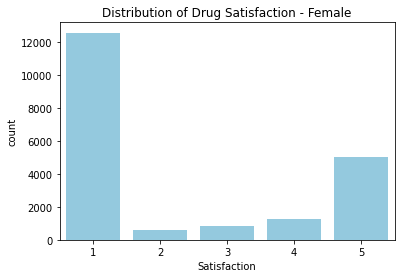

In [14]:
plt.title('Distribution of Drug Satisfaction - Female')
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost)

"""
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
"""

## Time Series of Drug Satisfaction

In [15]:
#Top 5 Drugs considering both count and average satisfaction
df_tmp = df_ost.groupby('Drug')['Satisfaction'].agg(count='size', mean='mean').reset_index()
df_tmp['weighted_metric'] = (df_tmp['mean'] * df_tmp['count'])
display(df_tmp.sort_values(by = ['mean'], ascending = False).head(5))
print('\n\n')
display(df_tmp.sort_values(by = ['count'], ascending = False).head(5))

,Drug,count,mean,weighted_metric
0,actical,2,5.0,10.0
5,c calcium,6,5.0,30.0
16,liquid calcium + vitamin d,1,5.0,5.0
11,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,1,5.0,5.0
14,citracal-vitamin d tablet,9,5.0,45.0


,Drug,count,mean,weighted_metric
20,"reclast bottle, infusion",10381,2.739620,28440.0
19,prolia syringe,6986,1.840825,12860.0
2,actonel tablet osteoporosis agents,1665,1.680480,2798.0
3,atelvia,571,1.691769,966.0
1,actonel 35 mg tablet,300,2.040000,612.0


<AxesSubplot:title={'center':'Top 3 Drug Satisfaction Over Time- Female'}, xlabel='Year', ylabel='Satisfaction'>

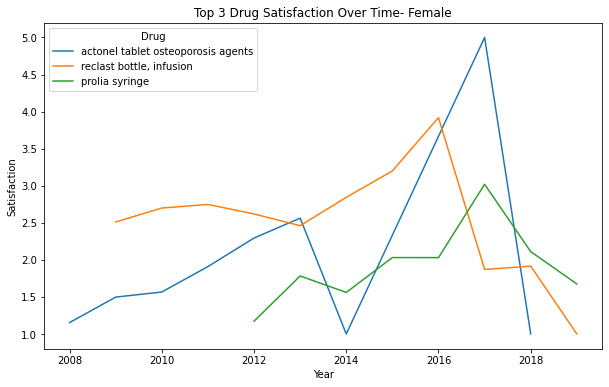

In [16]:
df_drug1 = df_ost.loc[df_ost['Drug'].str.contains("reclast bottle, infusion", case=False)]
df_drug2 = df_ost.loc[df_ost['Drug'].str.contains("prolia syringe", case=False)]
df_drug3 = df_ost.loc[df_ost['Drug'].str.contains("actonel tablet osteoporosis agents", case=False)]
#df_drug4 = df_ost.loc[df_ost['Drug'].str.contains("atelvia", case=False)]
#df_drug5 = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]


df_drugs = pd.concat([df_drug1, df_drug2, df_drug3])


fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 3 Drug Satisfaction Over Time- Female')
sns.lineplot(x = 'Year', y = 'Satisfaction', hue = 'Drug', data=df_drugs.groupby(["Year", "Drug"])["Satisfaction"].mean().reset_index())

In [17]:
#Satisfaction of drugs over the years
df_tmp = df_ost.groupby('Year')['Satisfaction'].agg(count='size', mean='mean').reset_index()
df_tmp['weighted_metric'] = (df_tmp['count'] * df_tmp['mean'])
df_tmp

#df_ost.groupby(["Year"])["Satisfaction"].agg(count='size', mean='mean').reset_index()

,Year,count,mean,weighted_metric
0,2007.0,77,3.506494,270.0
1,2008.0,404,1.413366,571.0
2,2009.0,2768,2.323699,6432.0
3,2010.0,3561,2.531592,9015.0
4,2011.0,1937,2.608673,5053.0
5,2012.0,867,1.950404,1691.0
6,2013.0,1921,1.995315,3833.0
7,2014.0,3297,1.881711,6204.0
8,2015.0,3242,2.400987,7784.0
9,2016.0,1077,2.888579,3111.0


(2008.0, 2019.0)

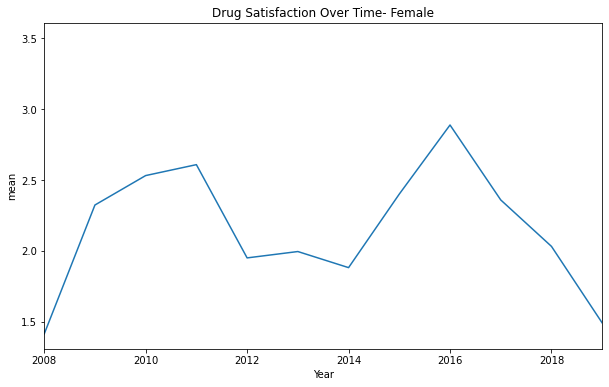

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Drug Satisfaction Over Time- Female')
sns.lineplot(x = 'Year', y = 'mean', data=df_tmp, ax=ax)
ax.set_xlim(2008, 2019)

# Bin 0-44, 45-54, 55-64, 65-74, 75+

<AxesSubplot:title={'center':'Ratings Across Age Group'}, xlabel='Age', ylabel='count'>

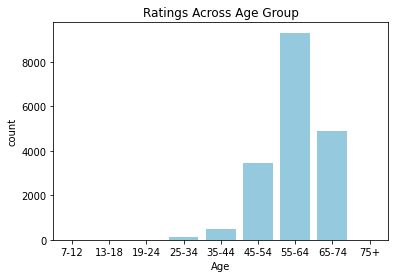

In [19]:
plt.title('Ratings Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["7-12", "13-18", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"])
#scrap 0-44  

In [20]:
bin_age = []

for age in df_ost['Age']:
    if age == '7-12':
        bin_age.append('0-44')
    elif age == '13-18':
        bin_age.append('0-44')
    elif age == '19-24':
        bin_age.append('0-44')
    elif age == '25-34':
        bin_age.append('0-44')
    elif age == '35-44':
        bin_age.append('0-44')
    elif age == '45-54':
        bin_age.append('45-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65-74')
    elif age == '75 or over':
        bin_age.append('75+')
    else:
        #Combine missing values into the most frequent bin
        bin_age.append('55-64')

df_ost['Age'] = bin_age

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_34308\1732776310.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost['Age'] = bin_age


<AxesSubplot:title={'center':'Count Across Age Group'}, xlabel='Age', ylabel='count'>

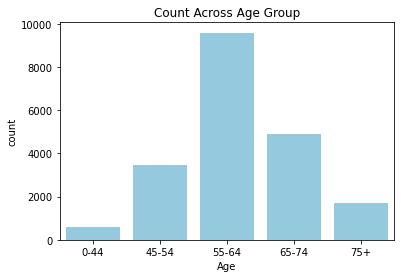

In [21]:
plt.title('Count Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])

<AxesSubplot:title={'center':'Ratings for Women Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

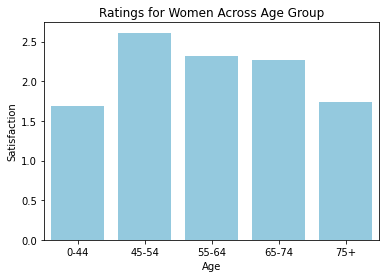

In [22]:
plt.title('Ratings for Women Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

# Drug Specific Analysis

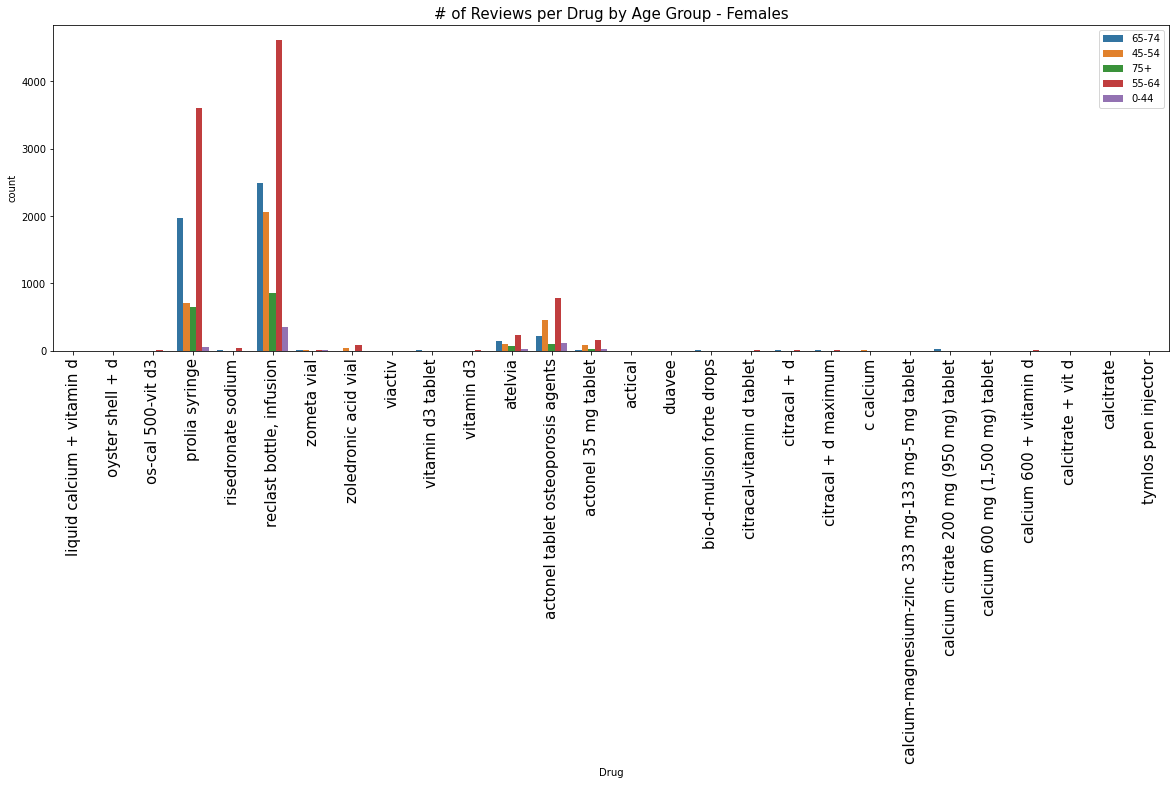

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
plt.title('# of Reviews per Drug by Age Group - Females', fontsize = 15)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);
plt.legend(loc='upper right')

In [24]:
#Top 5 Drugs considering both count and average satisfaction
df_tmp = df_ost.groupby(['Drug', 'Age'])['Satisfaction'].agg(count='size', mean='mean').reset_index()
display(df_tmp.sort_values(by=['mean'], ascending = False).head(5))
print('\n\n')
display(df_tmp.sort_values(by=['count'], ascending = False).head(5))

,Drug,Age,count,mean
0,actical,55-64,2,5.0
16,bio-d-mulsion forte drops,65-74,8,5.0
30,liquid calcium + vitamin d,65-74,1,5.0
25,citracal + d,65-74,4,5.0
23,calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet,55-64,1,5.0


,Drug,Age,count,mean
41,"reclast bottle, infusion",55-64,4615,2.786566
36,prolia syringe,55-64,3603,1.925618
42,"reclast bottle, infusion",65-74,2490,2.768273
40,"reclast bottle, infusion",45-54,2060,3.092718
37,prolia syringe,65-74,1965,1.731298


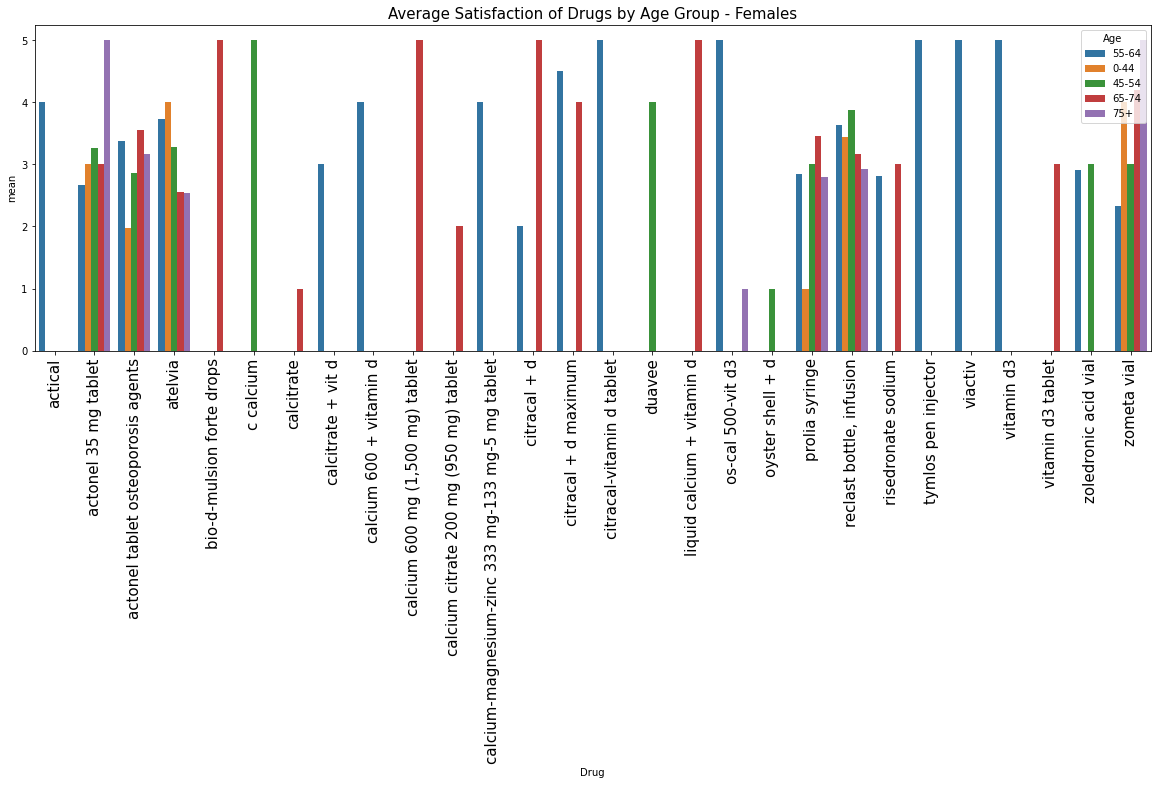

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(20,6)
plt.title('Average Satisfaction of Drugs by Age Group - Females', fontsize = 15)
sns_bar = sns.barplot(x = 'Drug', y = 'mean', hue = 'Age', data = df_tmp)
plt.setp(sns_bar.get_xticklabels(), rotation=90, fontsize = 15);

# Miscellaneous

Text(0.5, 1.0, 'Top: The number of drugs per condition.')

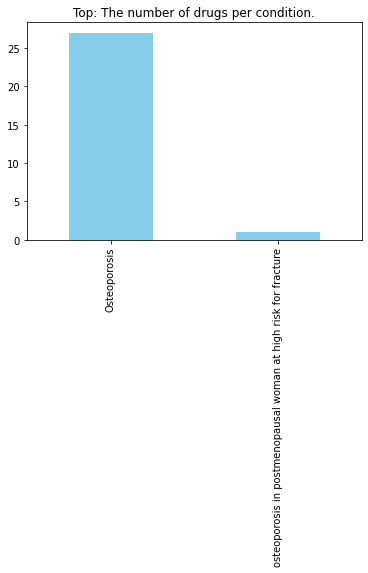

In [27]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar",color="skyblue")
plt.xlabel("")
plt.ylabel("")
plt.title("Top: The number of drugs per condition.")

#figsize = (14,6), fontsize = 10,

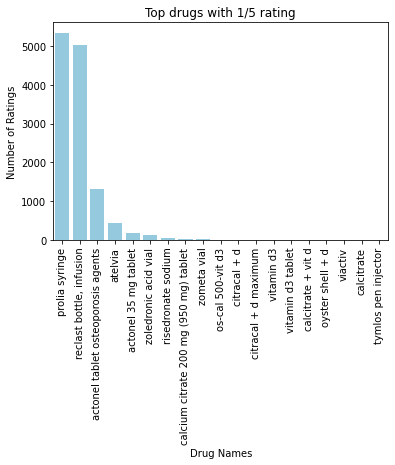

In [28]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color = 'skyblue')

sns_rating.set_title('Top drugs with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [29]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in df_ost.Condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_ost[df_ost.Condition == i].Drug.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_ost.Drug == j) >= 10:
            temp_ls.append((j, np.sum(df_ost[df_ost.Drug == j].Satisfaction) / np.sum(df_ost.Drug == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [30]:
#df_drugs.groupby(['Drug','Year'])['Satisfaction'].agg(count='size', mean='mean').reset_index()